# **CIS 5450 Final Project - Climate Change Analysis**
*Wendy Deng, Anna Zhou, Kaily Liu*

**NOTES: might want to use Spark to run model/plotting faster**

# Part 1: Introduction

**[ADD COMMENT]**

# Part 2: Data Loading

**[ADD COMMENT]**

In [1]:
!pip install cartopy

In [2]:
import numpy as np 
import pandas as pd 
#from google.colab import drive

#visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import plotly.graph_objects as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

#stat
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#when reading directly from kaggle notebook
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


## 2.1 Loading & Preprocessing Global Temperatures Data

### 2.1.1 Loading Data

In [3]:
global_temp = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

### 2.1.2 Analyzing Data Structure & Subsetting Data

In [4]:
global_temp.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
global_temp.tail(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


As we can see from dt, our data documents temperature in land and ocean from 1750 to 2015, incrementing monthly

In [6]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


The column 'dt' is currrently of type object, we would want to convert that to type datetime for easier analysis, as well as adding another column for year for separating the data into subsets.

In [7]:
#convert dt to a datetime object
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

#add a column for year
global_temp["year"] = global_temp['dt'].dt.year.values

In [8]:
global_temp.describe()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
count,3192,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,3192.000000
mean,1882-12-15 23:02:15.338345984,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1882.500000
min,1750-01-01 00:00:00,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,1750.000000
25%,1816-06-23 12:00:00,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000,1816.000000
50%,1882-12-16 12:00:00,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000,1882.500000
75%,1949-06-08 12:00:00,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000,1949.000000
max,2015-12-01 00:00:00,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,2015.000000
std,NaN,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587,76.799074


Since land temperature starts in 1750 and max, min, and ocean temperature start in 1850, we will analyze the land and ocean temperatures separately. We will create two dataframes: one for land average temperature,  one for land and ocean temperatures after 1850.

In [131]:
global_temp_land = global_temp[['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'year']].reset_index(drop=True)

In [132]:
global_temp_land_and_ocean = global_temp[global_temp['dt'].dt.year > 1850]

columns = [
    'dt',
    'LandMaxTemperature', 
    'LandMaxTemperatureUncertainty', 
    'LandMinTemperature', 
    'LandMinTemperatureUncertainty', 
    'LandAndOceanAverageTemperature', 
    'LandAndOceanAverageTemperatureUncertainty'
]

global_temp_land_and_ocean = global_temp_land_and_ocean[columns].reset_index(drop=True)

### 2.1.3 Analyzing Land Temperatures Data & Handling Missing Values

In [133]:
global_temp_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dt                                 3192 non-null   datetime64[ns]
 1   LandAverageTemperature             3180 non-null   float64       
 2   LandAverageTemperatureUncertainty  3180 non-null   float64       
 3   year                               3192 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 87.4 KB


In [134]:
global_temp_land.describe()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,year
count,3192,3180.000000,3180.000000,3192.000000
mean,1882-12-15 23:02:15.338345984,8.374731,0.938468,1882.500000
min,1750-01-01 00:00:00,-2.080000,0.034000,1750.000000
25%,1816-06-23 12:00:00,4.312000,0.186750,1816.000000
50%,1882-12-16 12:00:00,8.610500,0.392000,1882.500000
75%,1949-06-08 12:00:00,12.548250,1.419250,1949.000000
max,2015-12-01 00:00:00,19.021000,7.880000,2015.000000
std,NaN,4.381310,1.096440,76.799074


We will take a look at the rows with nulls to decide whether to drop them or to impute the missing values

In [135]:
global_temp_land_null = global_temp_land[global_temp_land.isnull().any(axis=1)]

In [136]:
global_temp_land_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 10 to 32
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dt                                 12 non-null     datetime64[ns]
 1   LandAverageTemperature             0 non-null      float64       
 2   LandAverageTemperatureUncertainty  0 non-null      float64       
 3   year                               12 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 432.0 bytes


In [137]:
global_temp_land_null.describe()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,year
count,12,0.0,0.0,12.000000
mean,1751-12-24 00:00:00,NaN,NaN,1751.416667
min,1750-11-01 00:00:00,NaN,NaN,1750.000000
25%,1751-09-08 00:00:00,NaN,NaN,1751.000000
50%,1752-01-01 00:00:00,NaN,NaN,1751.500000
75%,1752-06-08 12:00:00,NaN,NaN,1752.000000
max,1752-09-01 00:00:00,NaN,NaN,1752.000000
std,NaN,NaN,NaN,0.668558


There are only 12 rows that have missing values in 'LandAverageTemperature' and 'LandAverageTemperatureUncertainty', which is $12/3193 = 0.00376$ of the data and they are all within the years 1750 to 1752, which are the first three years in which this data is collected. Since it is likely that these data got lost due to how early they were collected and they only constitute $0.376$% of the data, we decided to drop these rows.

In [138]:
global_temp_land_cleaned = global_temp_land.dropna()

### 2.1.4 Analyzing Land and Ocean Data & Handling Missing Values

In [139]:
global_temp_land_and_ocean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         1980 non-null   datetime64[ns]
 1   LandMaxTemperature                         1980 non-null   float64       
 2   LandMaxTemperatureUncertainty              1980 non-null   float64       
 3   LandMinTemperature                         1980 non-null   float64       
 4   LandMinTemperatureUncertainty              1980 non-null   float64       
 5   LandAndOceanAverageTemperature             1980 non-null   float64       
 6   LandAndOceanAverageTemperatureUncertainty  1980 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 108.4 KB


In [140]:
global_temp_land_and_ocean.describe()

,dt,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1980,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,1933-06-16 15:06:10.909090816,14.355897,0.468175,2.748318,0.424944,15.214659,0.127443
min,1851-01-01 00:00:00,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,1892-03-24 06:00:00,10.212000,0.141750,-1.327750,0.154000,14.048500,0.062000
50%,1933-06-16 00:00:00,14.765000,0.250000,2.957000,0.277500,15.252000,0.122000
75%,1974-09-08 12:00:00,18.451500,0.529250,6.778750,0.453000,16.397000,0.149000
max,2015-12-01 00:00:00,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000
std,NaN,4.311056,0.563405,4.156410,0.435509,1.273577,0.072317


In [141]:
global_temp_land_and_ocean_cleaned = global_temp_land_and_ocean.copy()

There are no nulls, we can proceed with loading other datasets.

## 2.2 Loading & Preprocessing Global Temperatures by State Data

### 2.2.1 Loading Data

In [19]:
global_temp_state = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv')

### 2.2.2 Analyzing Data Structure 

In [20]:
global_temp_state.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [21]:
global_temp_state.tail(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China
645674,2013-09-01,NaN,NaN,Zhejiang,China


In [22]:
global_temp_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [23]:
#convert 'dt' to datetime
global_temp_state['dt'] = pd.to_datetime(global_temp_state['dt'])

In [24]:
global_temp_state.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,645675,620027.000000,620027.000000
mean,1898-10-01 22:21:19.022418688,8.993111,1.287647
min,1743-11-01 00:00:00,-45.389000,0.036000
25%,1845-12-01 00:00:00,-0.693000,0.316000
50%,1902-02-01 00:00:00,11.199000,0.656000
75%,1957-12-01 00:00:00,19.899000,1.850000
max,2013-09-01 00:00:00,36.339000,12.646000
std,NaN,13.772150,1.360392


In [25]:
len(global_temp_state['State'].unique().tolist())

241

In [26]:
len(global_temp_state['Country'].unique().tolist())

7

**[ADD COMMENT]**

### 2.2.3 Analyzing Data & Handling Missing Values

In [27]:
global_temp_state_null = global_temp_state[global_temp_state.isnull().any(axis=1)]

In [28]:
global_temp_state_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25648 entries, 14 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             25648 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null      float64       
 2   AverageTemperatureUncertainty  0 non-null      float64       
 3   State                          25648 non-null  object        
 4   Country                        25648 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.2+ MB


In [29]:
global_temp_state_null.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,25648,0.0,0.0
mean,1801-03-07 17:58:12.202120192,NaN,NaN
min,1743-12-01 00:00:00,NaN,NaN
25%,1762-01-01 00:00:00,NaN,NaN
50%,1799-12-01 00:00:00,NaN,NaN
75%,1830-11-01 00:00:00,NaN,NaN
max,2013-09-01 00:00:00,NaN,NaN
std,NaN,NaN,NaN


We will plot the 'dt' column of the missing values on a histogram to see if there are any patterns.

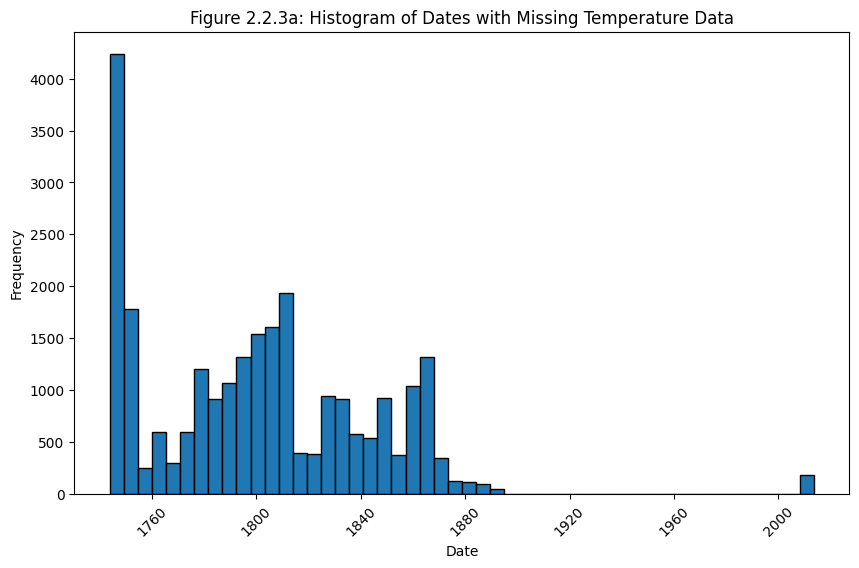

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(global_temp_state_null['dt'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3a: Histogram of Dates with Missing Temperature Data')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

There are 25648 rows with missing values within 645675 rows ($3.97$% of total data), and according to Figure 2.2.3a, these rows are concentrated in the earlier time periods, meaning that dropping these rows may introduce some bias or distort historical trends in our analysis, especially since we are analyzing climate change. We will visualize the trend of the entire dataset in **Part 3: EDA** before deciding on what to do with these missing values.

Do the same with 'State' column.

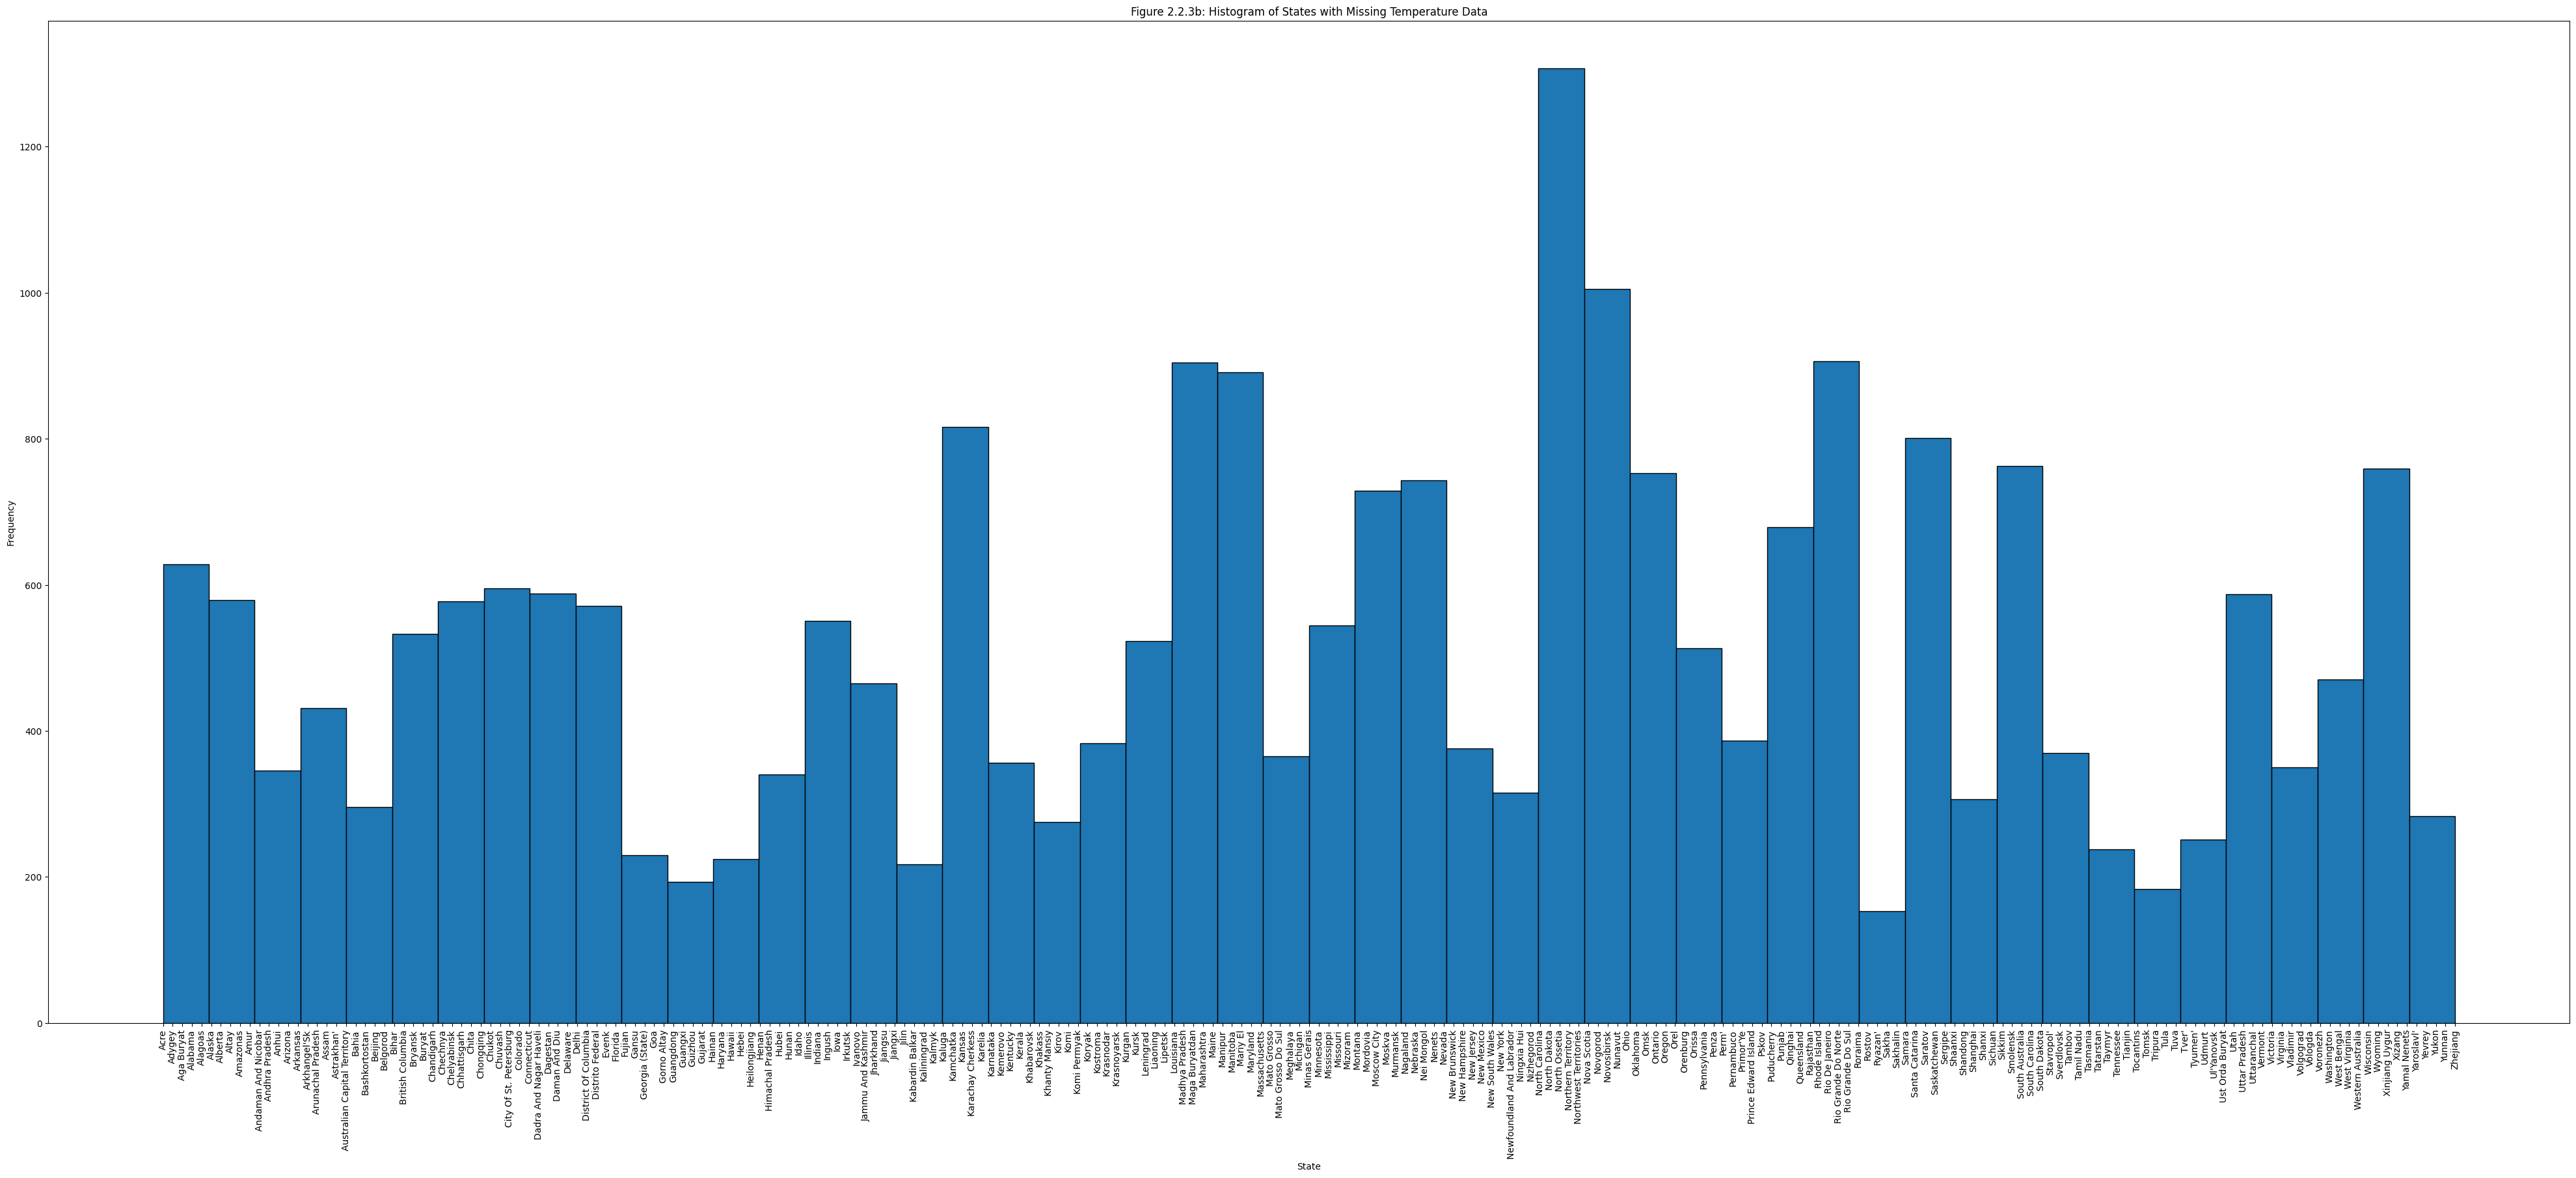

In [31]:
plt.figure(figsize=(50, 20))
plt.hist(global_temp_state_null['State'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3b: Histogram of States with Missing Temperature Data')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.show()

**[ADD COMMENT]**

Do the same with 'Country' column.

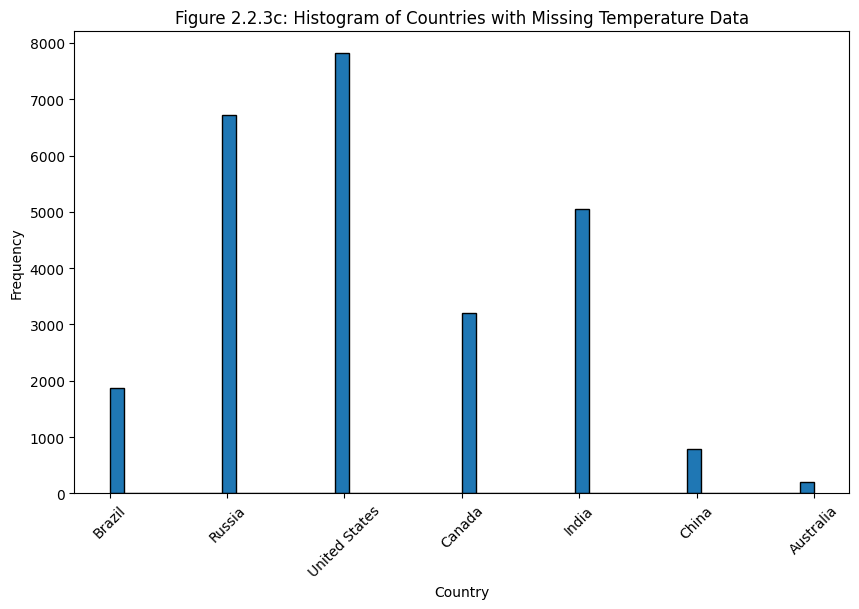

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(global_temp_state_null['Country'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3c: Histogram of Countries with Missing Temperature Data')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

**[ADD COMMENT]**

## 2.3 Loading & Preprocessing Global Temperatures by Country Data

### 2.3.1 Loading Data

In [33]:
global_temp_country = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

### 2.3.2 Analyzing Data Structure 

In [34]:
global_temp_country.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [35]:
global_temp_country.tail(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [36]:
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [37]:
global_temp_country['dt'] = pd.to_datetime(global_temp_country['dt'])

In [38]:
global_temp_country.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,577462,544811.000000,545550.000000
mean,1909-04-11 16:09:14.692083712,17.193354,1.019057
min,1743-11-01 00:00:00,-37.658000,0.052000
25%,1862-12-01 00:00:00,10.025000,0.323000
50%,1914-04-01 00:00:00,20.901000,0.571000
75%,1964-03-01 00:00:00,25.814000,1.206000
max,2013-09-01 00:00:00,38.842000,15.003000
std,NaN,10.953966,1.201930


In [39]:
len(global_temp_country['Country'].unique().tolist())

243

**[ADD COMMENT]**

### 2.3.3 Analyzing Data & Handling Missing Values

In [40]:
global_temp_country_null = global_temp_country[global_temp_country.isnull().any(axis=1)]

In [41]:
global_temp_country_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32651 entries, 1 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             32651 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null      float64       
 2   AverageTemperatureUncertainty  739 non-null    float64       
 3   Country                        32651 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.2+ MB


In [42]:
global_temp_country_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32651 entries, 1 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             32651 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null      float64       
 2   AverageTemperatureUncertainty  739 non-null    float64       
 3   Country                        32651 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.2+ MB


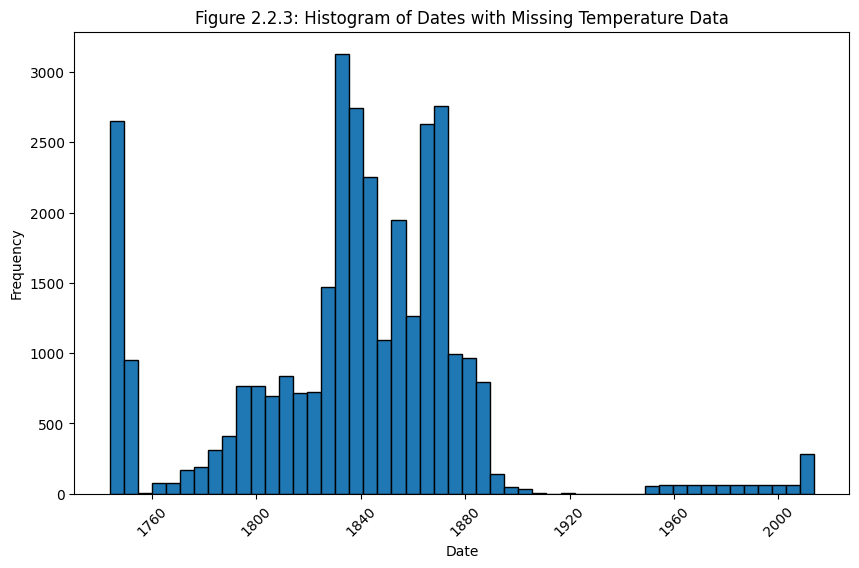

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(global_temp_country_null['dt'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3: Histogram of Dates with Missing Temperature Data')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

**[ADD COMMENT]**

Do the same with 'Country' column.

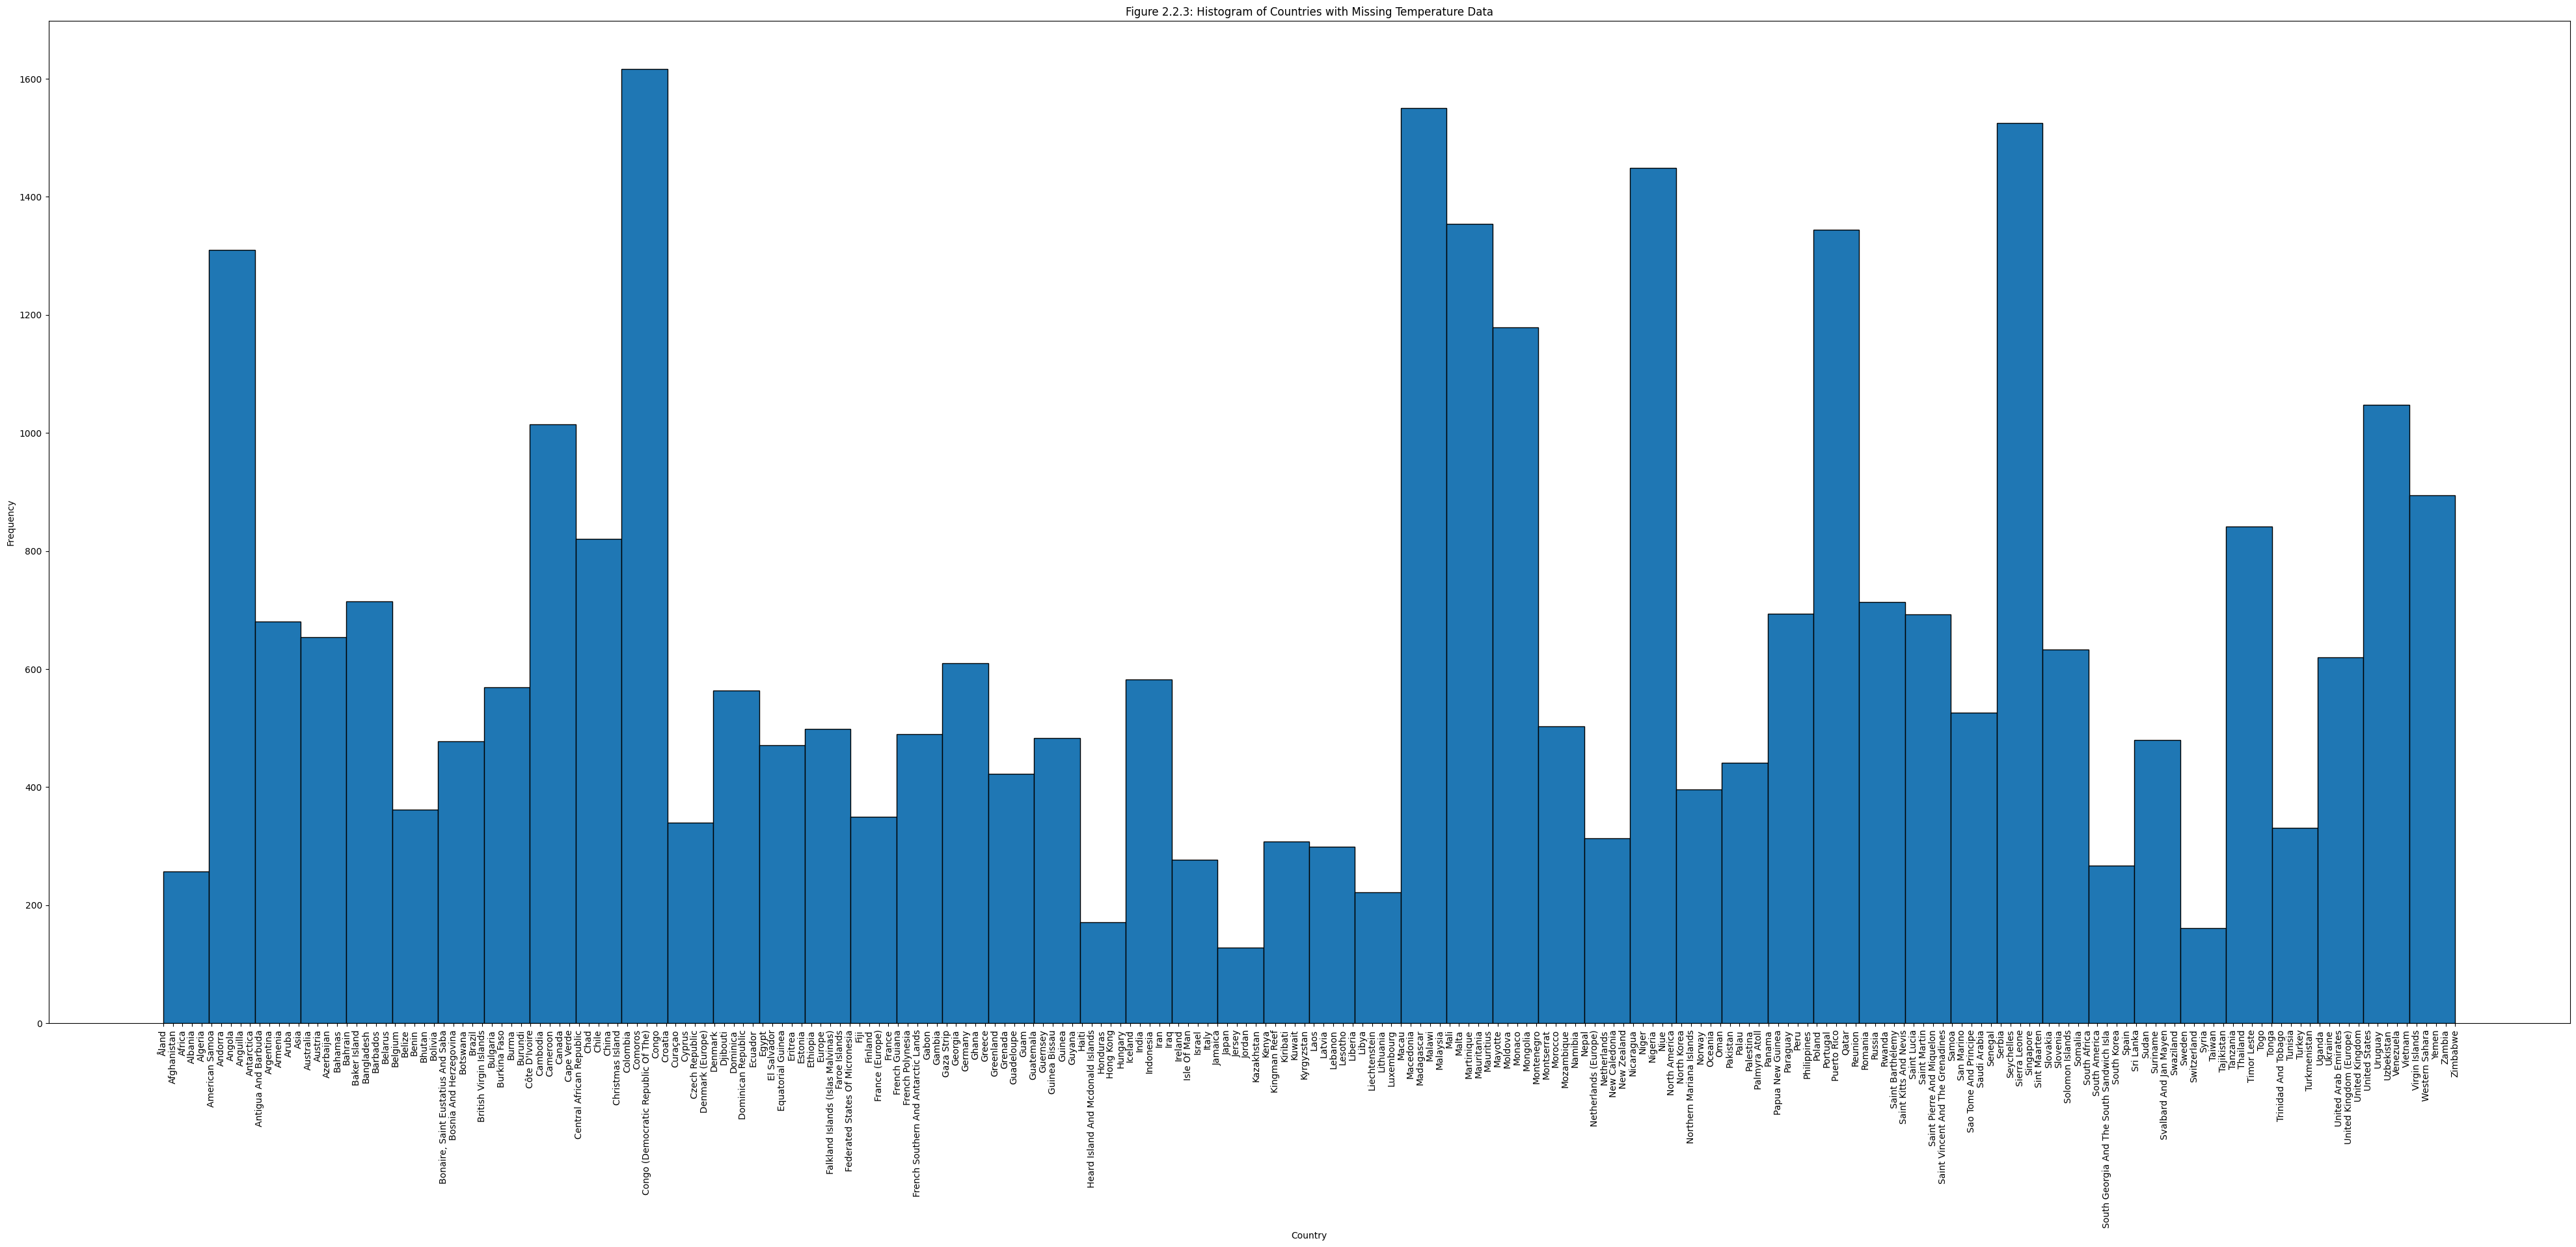

In [124]:
plt.figure(figsize=(50, 20))
plt.hist(global_temp_country_null['Country'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3: Histogram of Countries with Missing Temperature Data')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.show()

**[ADD COMMENT]**

## 2.4 Loading & Preprocessing Global Temperatures by City Data

### 2.4.1 Loading Data

In [45]:
global_temp_city = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')

### 2.4.2 Analyzing Data Structure 

In [46]:
global_temp_city.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [47]:
global_temp_city.tail(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599202,2012-12-01,4.303,0.341,Zwolle,Netherlands,52.24N,5.26E
8599203,2013-01-01,1.479,0.217,Zwolle,Netherlands,52.24N,5.26E
8599204,2013-02-01,1.559,0.304,Zwolle,Netherlands,52.24N,5.26E
8599205,2013-03-01,2.253,0.267,Zwolle,Netherlands,52.24N,5.26E
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [48]:
global_temp_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [49]:
global_temp_city['dt'] = pd.to_datetime(global_temp_city['dt'])

In [50]:
global_temp_city.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,8599212,8.235082e+06,8.235082e+06
mean,1907-10-21 07:06:00.828411904,1.672743e+01,1.028575e+00
min,1743-11-01 00:00:00,-4.270400e+01,3.400000e-02
25%,1860-06-01 00:00:00,1.029900e+01,3.370000e-01
50%,1911-09-01 00:00:00,1.883100e+01,5.910000e-01
75%,1962-09-01 00:00:00,2.521000e+01,1.349000e+00
max,2013-09-01 00:00:00,3.965100e+01,1.539600e+01
std,NaN,1.035344e+01,1.129733e+00


In [51]:
len(global_temp_city['City'].unique().tolist())

3448

In [52]:
len(global_temp_city['Country'].unique().tolist())

159

### 2.4.3 Analyzing Data & Handling Missing Values

Since Latitude and Longtitude are of type object due to their ending letters, we will drop them and convert both columns to type float with signs for easier visualization.

In [53]:
#drop the ending letter in Latitude and Longitude 
global_temp_city['Latitude'] = np.where(global_temp_city['Latitude'].str.contains('S'), 
                                        '-' + global_temp_city['Latitude'], 
                                        global_temp_city['Latitude'])
global_temp_city['Longitude'] = np.where(global_temp_city['Longitude'].str.contains('W'), 
                                         '-' + global_temp_city['Longitude'], 
                                         global_temp_city['Longitude'])

#convert Latitude and Longtitude to type float
global_temp_city['Latitude'] = global_temp_city['Latitude'].str.replace('N', '').str.replace('S', '').astype(float)
global_temp_city['Longitude'] = global_temp_city['Longitude'].str.replace('E', '').str.replace('W', '').astype(float)

Take a look at the nulls and their distribution before deciding to drop them or impute them.

In [54]:
global_temp_city_null = global_temp_city[global_temp_city.isnull().any(axis=1)]

In [55]:
global_temp_city_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364130 entries, 1 to 8599211
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             364130 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null       float64       
 2   AverageTemperatureUncertainty  0 non-null       float64       
 3   City                           364130 non-null  object        
 4   Country                        364130 non-null  object        
 5   Latitude                       364130 non-null  float64       
 6   Longitude                      364130 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 22.2+ MB


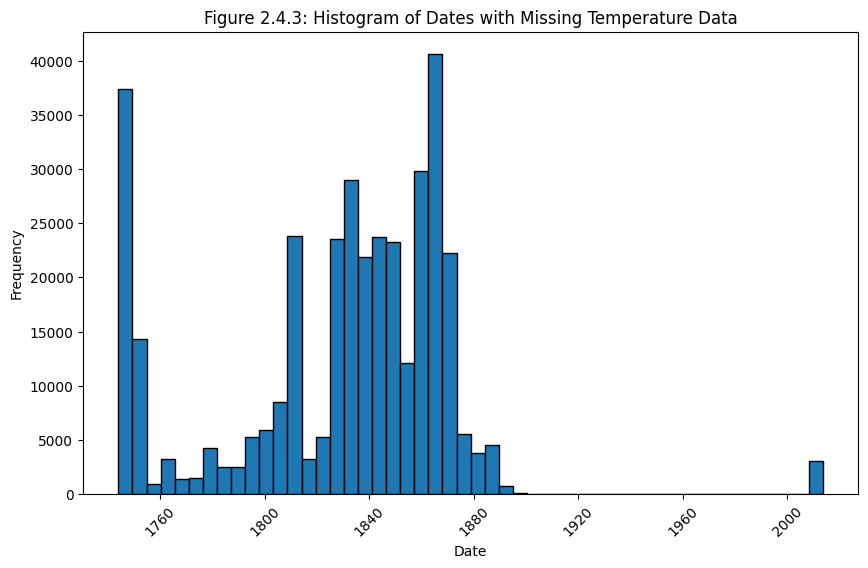

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(global_temp_city_null['dt'], bins=50, edgecolor='black')
plt.title('Figure 2.4.3: Histogram of Dates with Missing Temperature Data')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

**[ADD COMMENT]**

## 2.5 Loading & Preprocessing Global Temperatures by Major City Data

### 2.5.1 Loading Data

In [99]:
global_temp_major_city = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv')

### 2.5.2 Analyzing Data Structure 

In [100]:
global_temp_major_city.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [101]:
global_temp_major_city.tail(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239167,2012-12-01,-0.822,0.451,Xian,China,34.56N,108.97E
239168,2013-01-01,-1.635,0.432,Xian,China,34.56N,108.97E
239169,2013-02-01,2.362,0.558,Xian,China,34.56N,108.97E
239170,2013-03-01,10.110,0.480,Xian,China,34.56N,108.97E
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [102]:
global_temp_major_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [110]:
global_temp_major_city['dt'] = pd.to_datetime(global_temp_major_city['dt'])

In [104]:
global_temp_major_city.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,239177,228175.000000,228175.000000
mean,1910-11-08 03:29:45.557976064,18.125969,0.969343
min,1743-11-01 00:00:00,-26.772000,0.040000
25%,1864-02-01 00:00:00,12.710000,0.340000
50%,1914-02-01 00:00:00,20.428000,0.592000
75%,1963-12-01 00:00:00,25.918000,1.320000
max,2013-09-01 00:00:00,38.283000,14.037000
std,NaN,10.024800,0.979644


In [105]:
len(global_temp_major_city['City'].unique().tolist())

100

In [96]:
len(global_temp_major_city['Country'].unique().tolist())

49

### 2.5.3 Analyzing Data & Handling Missing Values

Same as the Global Temperatures by City data above, we will convert Latitude and Longtitude to type float.

In [106]:
#drop the ending letter in Latitude and Longitude 
global_temp_major_city['Latitude'] = np.where(global_temp_major_city['Latitude'].str.contains('S'), 
                                        '-' + global_temp_major_city['Latitude'], 
                                        global_temp_major_city['Latitude'])
global_temp_major_city['Longitude'] = np.where(global_temp_major_city['Longitude'].str.contains('W'), 
                                         '-' + global_temp_major_city['Longitude'], 
                                         global_temp_major_city['Longitude'])

#convert Latitude and Longtitude to type float
global_temp_major_city['Latitude'] = global_temp_major_city['Latitude'].str.replace('N', '').str.replace('S', '').astype(float)
global_temp_major_city['Longitude'] = global_temp_major_city['Longitude'].str.replace('E', '').str.replace('W', '').astype(float)

In [111]:
global_temp_major_city_null = global_temp_major_city[global_temp_major_city.isnull().any(axis=1)]

In [112]:
global_temp_major_city_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11002 entries, 36 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             11002 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null      float64       
 2   AverageTemperatureUncertainty  0 non-null      float64       
 3   City                           11002 non-null  object        
 4   Country                        11002 non-null  object        
 5   Latitude                       11002 non-null  float64       
 6   Longitude                      11002 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 687.6+ KB


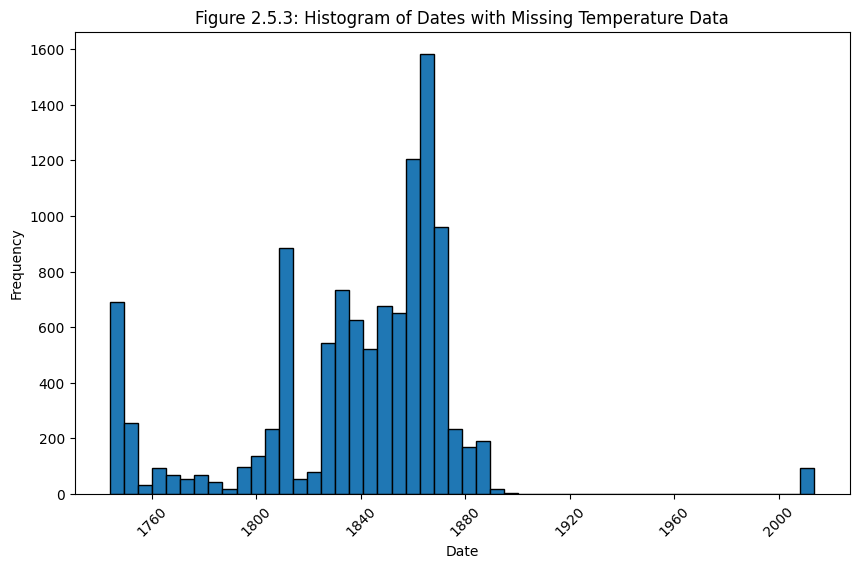

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(global_temp_major_city_null['dt'], bins=50, edgecolor='black')
plt.title('Figure 2.5.3: Histogram of Dates with Missing Temperature Data')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

**[ADD COMMENT]**

# Part 3: Exploratory Data Analysis

## 3.1 EDA in Global Land Temperatures Data

### 3.1.1 Visualize Trends in Land Data

/tmp/ipykernel_48/3213432546.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



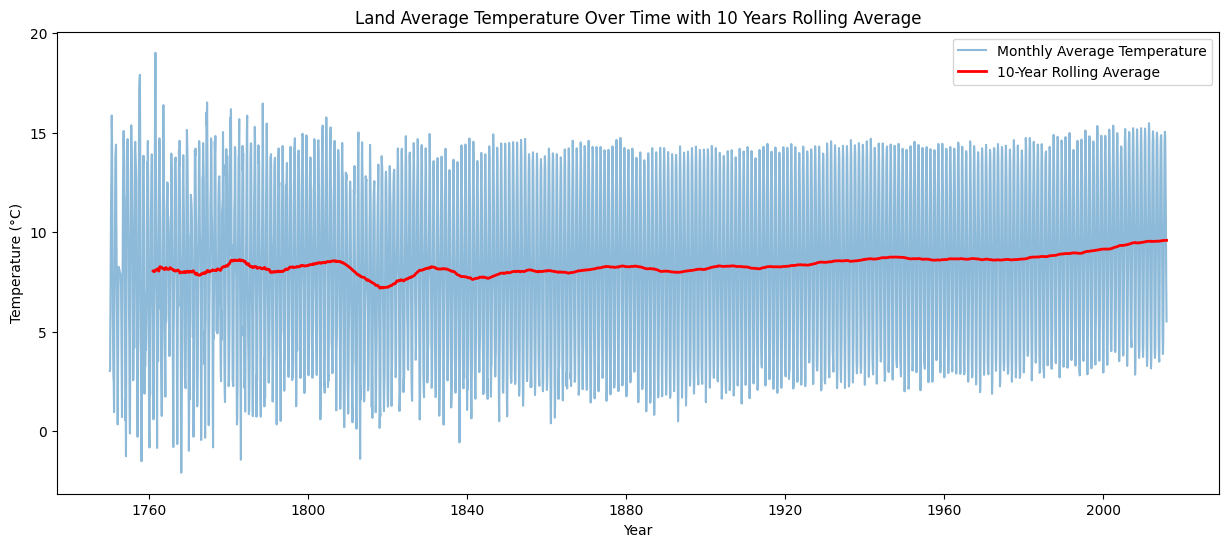

In [148]:
#calculate 10_year_rolling_avg
global_temp_land_cleaned['10_year_rolling_avg'] = global_temp_land_cleaned['LandAverageTemperature'].rolling(window=120).mean()

plt.figure(figsize=(15, 6))
plt.plot(global_temp_land_cleaned['dt'], global_temp_land_cleaned['LandAverageTemperature'], label='Monthly Average Temperature', alpha=0.5)
plt.plot(global_temp_land_cleaned['dt'], global_temp_land_cleaned['10_year_rolling_avg'], label='10-Year Rolling Average', color='red', linewidth=2)
plt.title('Land Average Temperature Over Time with 10 Years Rolling Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

We don't observe that much pattern; there is a slight upward trend, but not obvious enouhgh to be significant.

### 3.1.2 Interactive Graph

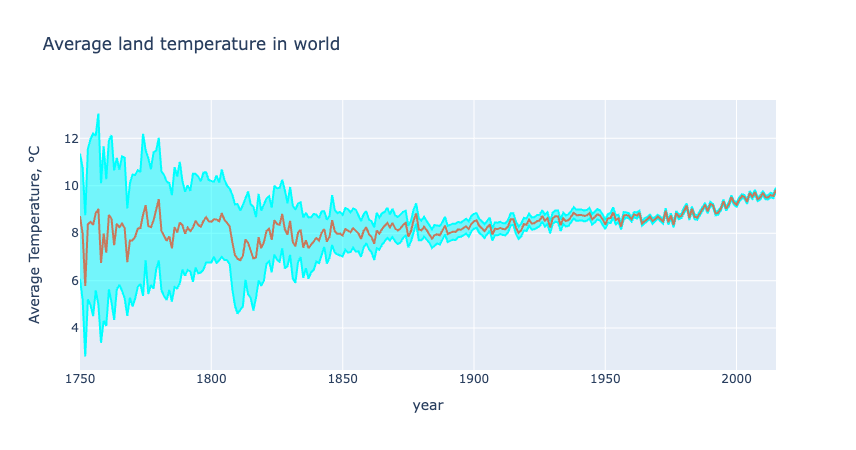

In [160]:
#Extract the year from a date
years = np.unique(global_temp_land_cleaned['dt'].dt.year)
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp_land_cleaned[global_temp_land_cleaned['dt'].dt.year == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp_land_cleaned[global_temp_land_cleaned['dt'].dt.year == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
                color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.1.3 Stationarity Check

Time series data often requires data to be stationary, meaning the mean and variance do not change over time. If this property is violated, then the data has some inherent trend, which is the case in climate change data. To check, we will set our alpha to be 0.05 and perform Dickey-Fuller test from *adfuller* package for stationarity. Our null hypothesis is that our data is not stationary.

In [145]:
print("The p-value for the ADF test in global_temp_land_cleaned is ", adfuller(global_temp_land_cleaned['LandAverageTemperature'])[1])

The p-value for the ADF test in global_temp_land_cleaned is  0.0014547223819058623


Since the p-value for *global_temp_land_cleaned* is less than alpha (0.05), **we reject the null hypothesis**. The *global_temp_land_cleaned* data is stationary. We can proceed with autocorrelations check.

### 3.1.4 Autocorrelations Check

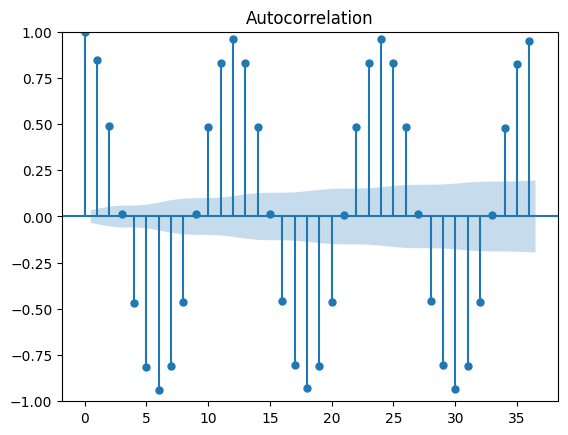

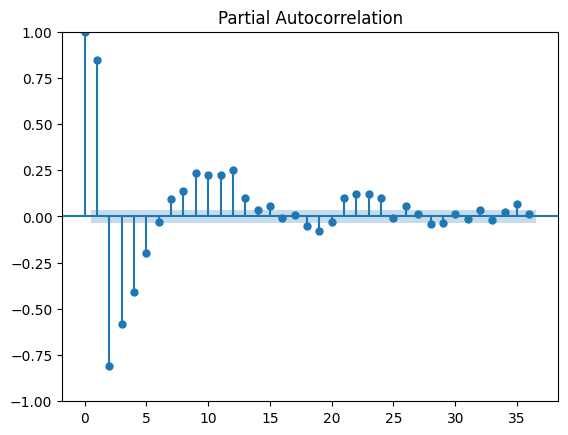

In [152]:
plot_acf(global_temp_land_cleaned['LandAverageTemperature'])
plot_pacf(global_temp_land_cleaned['LandAverageTemperature'])
plt.show()

**[ADD COMMENT]**

## 3.2 EDA in Global Land and Ocean Temperatures Data

### 3.2.1 Visualize Trends in Land and Ocean Data

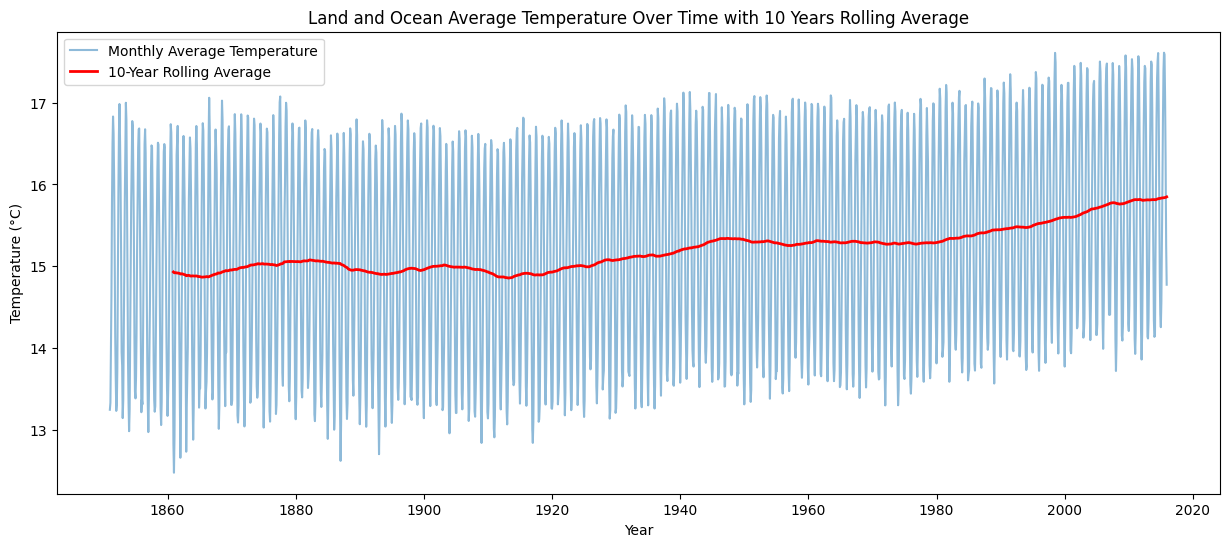

In [150]:
#calculate 10_year_rolling_avg
global_temp_land_and_ocean_cleaned['10_year_rolling_avg_ocean'] = global_temp_land_and_ocean_cleaned['LandAndOceanAverageTemperature'].rolling(window=120).mean()

plt.figure(figsize=(15, 6))
plt.plot(global_temp_land_and_ocean_cleaned['dt'], global_temp_land_and_ocean_cleaned['LandAndOceanAverageTemperature'], label='Monthly Average Temperature', alpha=0.5)
plt.plot(global_temp_land_and_ocean_cleaned['dt'], global_temp_land_and_ocean_cleaned['10_year_rolling_avg_ocean'], label='10-Year Rolling Average', color='red', linewidth=2)
plt.title('Land and Ocean Average Temperature Over Time with 10 Years Rolling Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Compared to the land temperature trend, the land and ocean temperature trend has a significantly steeper slope, indicating that ocean temperature has increased more over time compared to land temperature, which is concerning since 71 percent of Earth's surface is water. This could indicate the non-stationarity of the land and ocean temperatures.

### 3.2.2 Interactive Graph

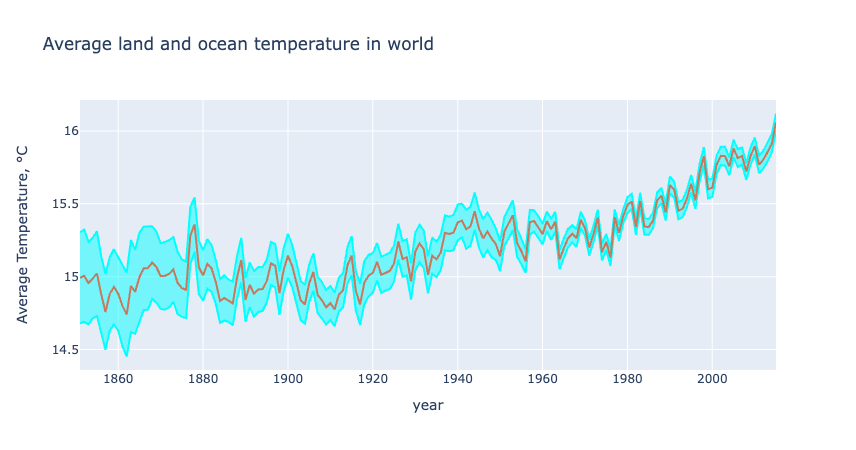

In [161]:
years_ocean = np.unique(global_temp_land_and_ocean_cleaned['dt'].dt.year)
mean_temp_world_ocean = []
mean_temp_world_ccean_uncertainty = []

for year in years_ocean:
    mean_temp_world_ocean.append(global_temp_land_and_ocean_cleaned[global_temp_land_and_ocean_cleaned['dt'].dt.year == year]['LandAndOceanAverageTemperature'].mean())
    mean_temp_world_ccean_uncertainty.append(global_temp_land_and_ocean_cleaned[global_temp_land_and_ocean_cleaned['dt'].dt.year == year]['LandAndOceanAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years_ocean, 
    y = np.array(mean_temp_world_ocean) + np.array(mean_temp_world_ccean_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
                color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years_ocean, 
    y = np.array(mean_temp_world_ocean) - np.array(mean_temp_world_ccean_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years_ocean, 
    y = mean_temp_world_ocean,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land and ocean temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**[ADD COMMENT]**

### 3.2.3 Stationarity in Global Land and Ocean Temperatures Data

In [151]:
print("The p-value for the ADF test in global_temp_land_and_ocean_cleaned is ", adfuller(global_temp_land_and_ocean_cleaned['LandAndOceanAverageTemperature'])[1])

The p-value for the ADF test in global_temp_land_and_ocean_cleaned is  0.7361269975239153


Since the p-value for *global_temp_land_and_ocean_cleaned* is greater than alpha (0.05), **we fail to reject the null hypothesis**. As expected, the *global_temp_land_and_ocean_cleaned* data is not stationary. 

## 3.3 EDA in Global Land Temperatures by State Data

## 3.4 EDA in Global Land Temperatures by Country Data

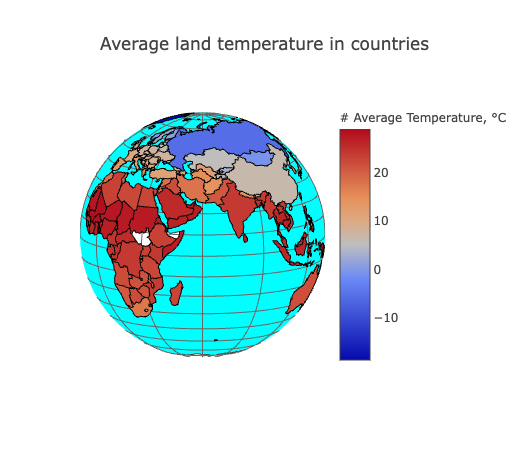

In [60]:
countries = np.unique(global_temp_country['Country'])
avg_temp_country = []
for country in countries:
    avg_temp_country.append(global_temp_country[global_temp_country['Country'] == country]['AverageTemperature'].mean())

#interactive
data = [dict(
        type = 'choropleth',
        locations = countries,
        z = avg_temp_country,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

## 3.5 EDA in Global Land Temperatures by City Data

### 3.5.1 Latitude

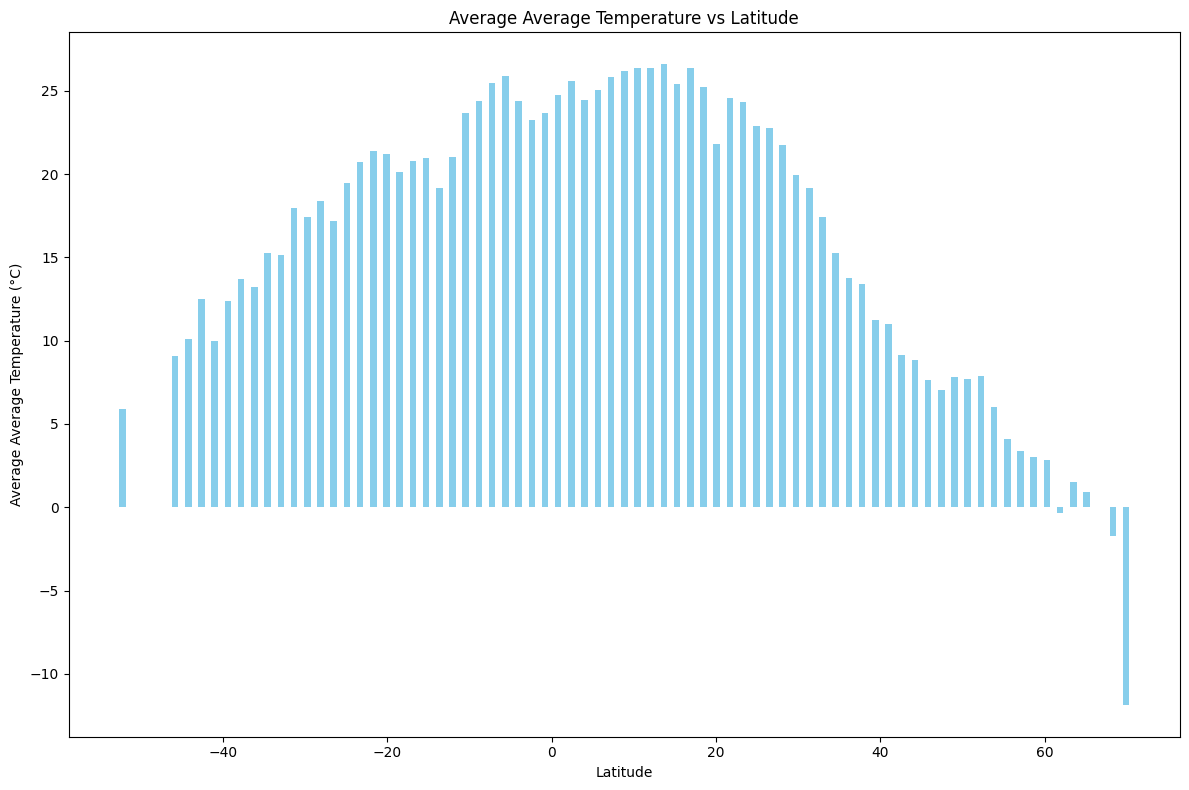

In [153]:
latitude_df = global_temp_city.sort_values(by='Latitude')

avg_temp_by_latitude = latitude_df.groupby('Latitude')['AverageTemperature'].mean()

plt.figure(figsize=(12, 8))
plt.bar(avg_temp_by_latitude.index, avg_temp_by_latitude.values, color='skyblue')
plt.xlabel('Latitude')
plt.ylabel('Average Average Temperature (°C)')
plt.title('Average Average Temperature vs Latitude')
plt.tight_layout()
plt.show()

**[ADD COMMENT]**

### 3.5.2 Contour Plot (FIX, not plotting because we haven't handled nulls yet)

/opt/conda/lib/python3.10/site-packages/pandas/core/series.py:917: RuntimeWarning:

invalid value encountered in cast



ValueError: z array must not contain non-finite values within the triangulation

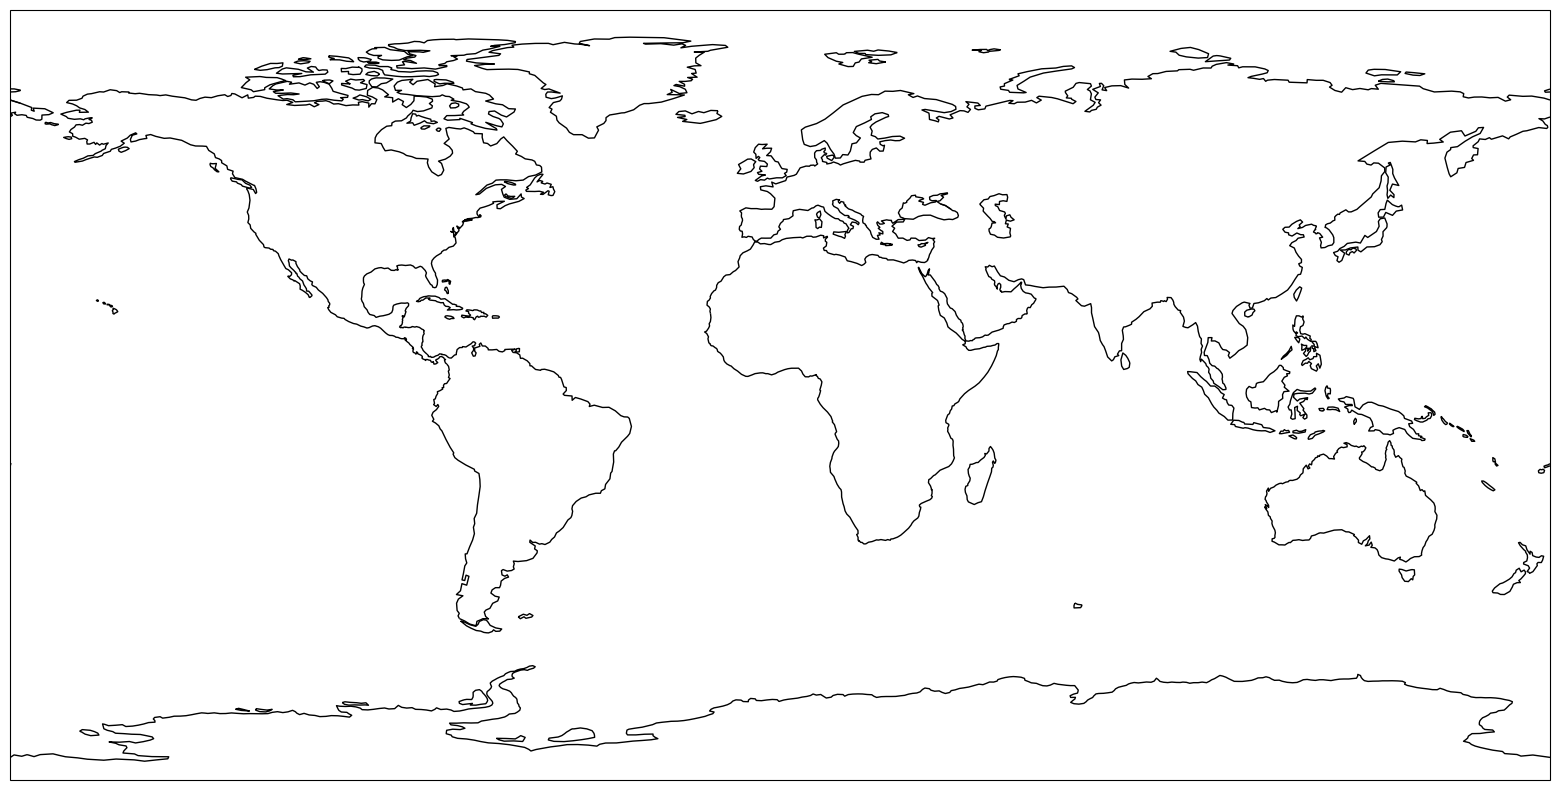

In [154]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

contour = plt.tricontourf(global_temp_city['Longitude'], global_temp_city['Latitude'], global_temp_city['AverageTemperature'],
                          transform=ccrs.PlateCarree(), cmap='coolwarm', levels=np.linspace(min(global_temp_city['AverageTemperature']), max(global_temp_city['AverageTemperature']), 30))

cbar = plt.colorbar(contour, orientation='vertical', pad=0.02, aspect=16, shrink=0.8)
cbar.set_label('Average Temperature (°C)', rotation=270, labelpad=20)

plt.title('Average Temperature Contour Plot on World Map')
plt.show()

## 3.4 EDA in Global Land Temperatures by Major City Data

In [ ]:
# #interactive 
# fig = go.Figure()

# fig.add_trace(
#     go.Scattergeo(
#         lon=global_temp_major_city['Longitude'],
#         lat=global_temp_major_city['Latitude'],
#         text=global_temp_major_city['City'],
#         mode='text',
#     )
# )

# fig.update_layout(
#     title='Average Temperature Contour Plot with Major Cities on World Map',
#     geo=dict(
#         resolution=50,
#         showland=True,
#         showlakes=True,
#         landcolor='rgb(217, 217, 217)',
#         countrycolor='rgb(82, 82, 82)',
#     )
# )

# py.iplot(fig)

# Part 4: Feature Engineering & Preprocessing

## 4.1 Correlation Matrix

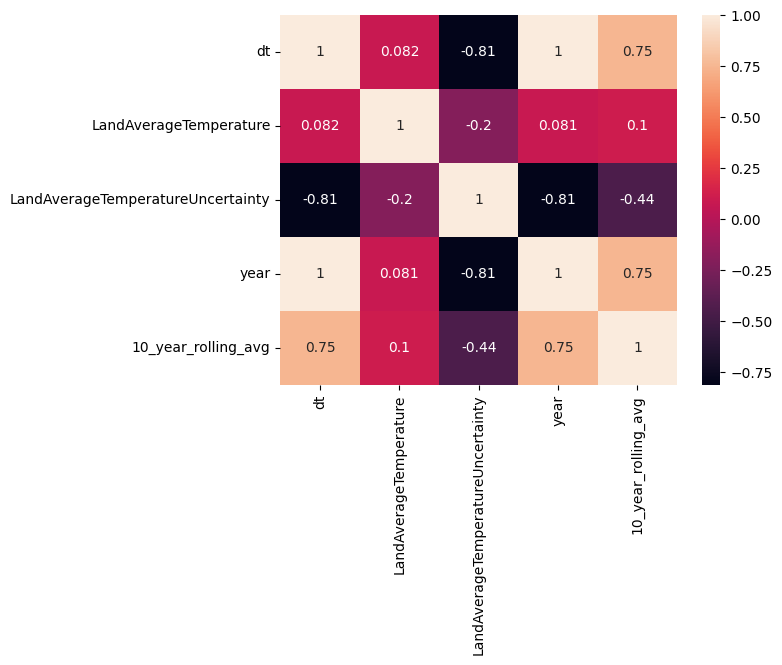

In [162]:
correlation_matrix_1 = global_temp_land_cleaned.corr()
sns.heatmap(correlation_matrix_1, annot=True)
plt.show()

There are pairs of variables that are closely related to each other, we will address those later during model building.

# Part 5: Modeling

## 5.1 Linear Regression (fix cuz time series data need to split by date instead of by random?)

In [ ]:
global_temp_city['dt'] = pd.to_datetime(global_temp_city['dt'])
global_temp_city['year'] = global_temp_city['dt'].dt.year
X = global_temp_city[['year']]
y = global_temp_city[['AverageTemperature']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_rg = LinearRegression()
lin_rg.fit(X_train, y_train)

### Predict on Future Years

In [ ]:
latest_year = global_temp_city['year'].max()
years_to_pred = []
for i in range(0, 501, 20):
    years_to_pred.append(latest_year + i)
future_years = pd.DataFrame({'year': years_to_pred})

predicted_temperatures = lin_rg.predict(future_years)

In [ ]:
plt.scatter(global_temp_city['year'], global_temp_city['AverageTemperature'], label='Observed Data')
plt.plot(future_years['year'], predicted_temperatures, 'ro-', label='Predicted Temperatures')
plt.xlabel('year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

### Evaluate Performance

In [ ]:
y_pred = lin_rg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')